<a href="https://colab.research.google.com/github/dourivaljunior/arquivos/blob/main/workshop_the_loan_prediction_problem_pre_proc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas pandas, numpy e o arquivo
  

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dourivaljunior/arquivos/main/loan_data.csv')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Analisando o dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


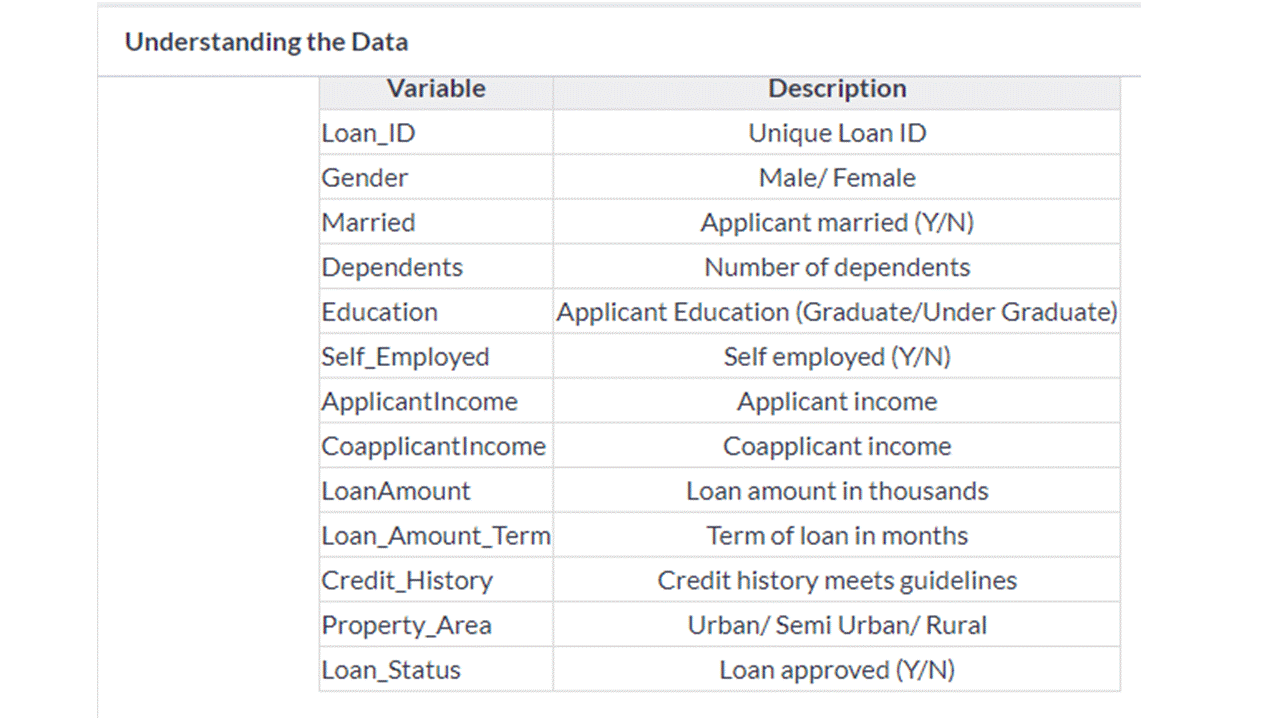

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Vou deletar a 1a coluna chamada de Loan_ID

In [ ]:
df=df.drop(columns=['Loan_ID'])

Checando se tem valores ausentes ou nulos no dataframe (missing values, NaN)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Começo do processo de ETA (Extract, Transform and Load) das variáveis.

Convertendo as variáveis categóricas em numéricas usando a função map.

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] =df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

Estudo das Variáveis Numéricas.

Vamos fazer uma investigação estatística nos valores das variáveis numéricas do dataframe determinando a média aritimética, desvio padrão, mediana e moda.

Preenchendo os valores ausentes com indicadores estatísticos (média aritimética, moda e mediana).

Para as variáveis categóricas vou preencher os valores ausentes com a moda.

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Calculando os indicadores estatísticos para as variáveis numéricas.


In [ ]:
print('LoanAmount',int(round(df['LoanAmount'].mean(),0)),int(round(df['LoanAmount'].std(),0)),
      int(round(df['LoanAmount'].median(),0)),int(round(df['LoanAmount'].mode(),0)))
print('Loan_Amount_Term',int(round(df['Loan_Amount_Term'].mean(),0)),int(round(df['Loan_Amount_Term'].std(),0)),
      int(round(df['Loan_Amount_Term'].median(),0)),int(round(df['Loan_Amount_Term'].mode(),0)))

LoanAmount 146 86 128 120
Loan_Amount_Term 342 65 360 360


Para as variáveis numéricas vou preencher os valores ausentes com a mediana ou a moda.

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

Pelos indicadores estatísticos não é possível tirar nenhuma conclusão a respeito da variável CoapplicantIncome.

In [ ]:
print('CoapplicantIncome',int(round(df['CoapplicantIncome'].mean(),0)),int(round(df['CoapplicantIncome'].std(),0)),
      int(round(df['CoapplicantIncome'].median(),0)),int(round(df['CoapplicantIncome'].mode(),0)))

CoapplicantIncome 1621 2926 1188 0


Realizando uma Análise estatística mais aprofundada nas variáveis numéricas. 

Loan_Amount, CoapplicantIncome e Applicant_Income

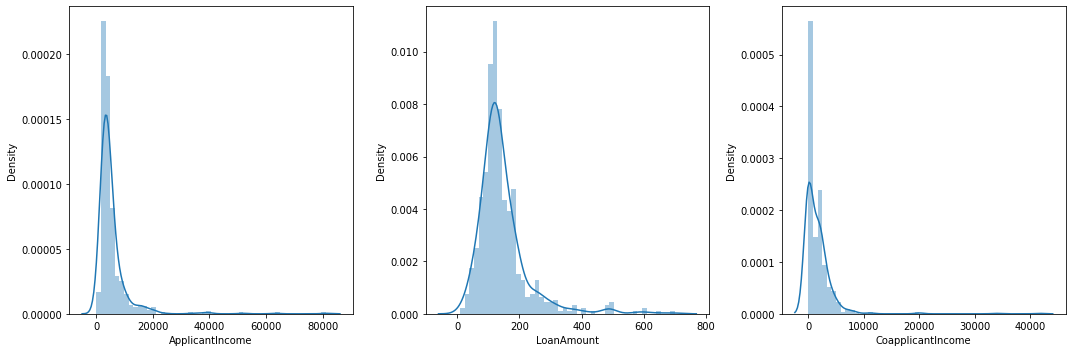

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 3, 2)
sns.distplot(df['LoanAmount'])
plt.subplot(1, 3, 3)
sns.distplot(df['CoapplicantIncome'])
plt.tight_layout()
plt.show()

Gráfico boxplot.

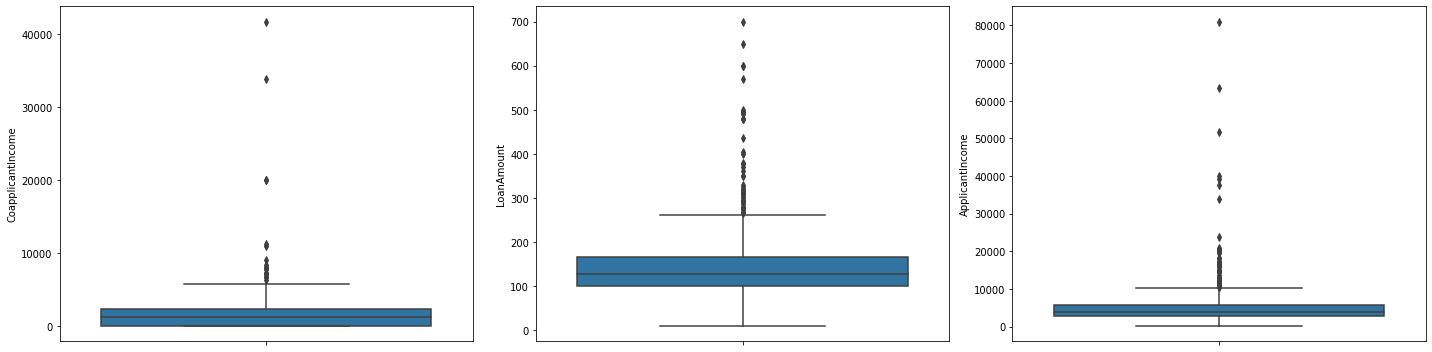

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df["CoapplicantIncome"])
plt.subplot(1, 3, 2)
sns.boxplot(y=df["LoanAmount"])
plt.subplot(1, 3, 3)
sns.boxplot(y=df["ApplicantIncome"])
plt.tight_layout()
plt.show()

Aparecimento de outliers. 

Distribuição Normal não centralizada.

Percebe-se que estas variáveis não obedecem a uma distribuição normal.

#Pela análise das variáveis estatísticas e do histograma a variável CoapplicantIncome pode ser desprezada.

In [ ]:
df=df.drop('CoapplicantIncome',axis=1)

# Vamos precisar aplicar uma função log ao conjunto de dados no sentido de melhorar o 'shape' da função de distribuição das variáveis numéricas LoanAmount e ApplicantIncome.

In [ ]:
df['LoanAmount']=df['LoanAmount'].map(lambda x:np.log(x))
df['ApplicantIncome']=df['ApplicantIncome'].map(lambda x:np.log(x))

# Plotando novamente o gráfico para as variáveis contínuas.

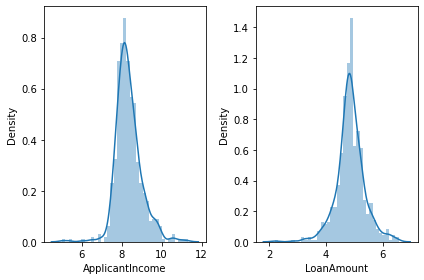

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.distplot(df['LoanAmount'])
plt.tight_layout()
plt.show()

Checando os 'missing values' após aplicação da técnica de imputação.

In [ ]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

Estudo da variável independente (target variable). No caso Loan_Status.

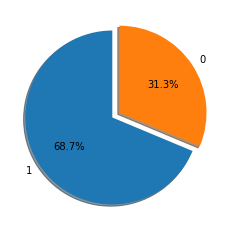

In [ ]:
X=df['Loan_Status'].value_counts().index
Y=round(df['Loan_Status'].value_counts()/df['Loan_Status'].count()*100,1)
labels = X
sizes = Y
separate = (0.05,0.05)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=separate, labels=labels, autopct='%2.1f%%',shadow=True, startangle=90)
plt.show()

Observação: percebe-se uma que cerca de 70% das solicitações de empréstimo foram aprovadas o que é absolutamente normal num modelo de empréstimo bancário.

Realizando uma investigação da variável Credit_History para sabermos a importância desta e qual a sua influência na variável (target variable) Loan_Status

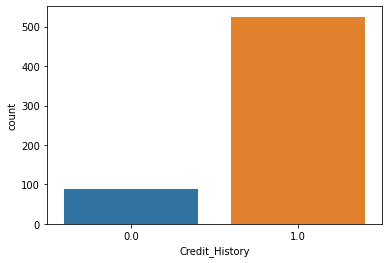

In [ ]:
sns.countplot(df['Credit_History'])
plt.show()

Técnica: Normalização.
Aplicação da normalização usando 'loop for' para tornar todos os valores das variáveis dentro do intervalo [0,1].

In [ ]:
for i in df.columns[1:]:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [ ]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.582270,0.609760,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.543501,0.609760,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.476150,0.457624,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.452363,0.594936,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.586321,0.631977,0.74359,1.0,1.0,1.0
5,0.0,1.0,0.666667,1.0,1.0,0.570074,0.778626,0.74359,1.0,1.0,1.0
6,0.0,1.0,0.000000,0.0,0.0,0.436183,0.541279,0.74359,1.0,1.0,1.0
7,0.0,1.0,1.000000,1.0,0.0,0.478046,0.658123,0.74359,0.0,0.5,0.0
8,0.0,1.0,0.666667,1.0,0.0,0.522114,0.672218,0.74359,1.0,1.0,1.0
9,0.0,1.0,0.333333,1.0,0.0,0.707258,0.840140,0.74359,1.0,0.5,0.0


In [ ]:
# saving the pre-processed data
from google.colab import files 
df.to_csv('loan_prediction_data_processing.csv', index=False)
files.download('loan_prediction_data_processing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#FIM  da parte de pré-processamento dos dados do DataFrame